In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Importing Data

In [26]:
crop = pd.read_csv('Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [27]:
crop.shape

(2200, 8)

In [28]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [29]:
crop.duplicated().sum()

0

In [30]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [31]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [32]:
correlation = crop.corr(numeric_only=True)

In [33]:
correlation

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

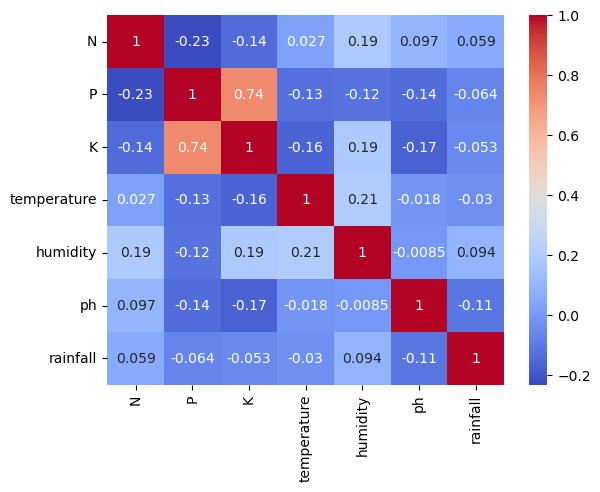

In [34]:
sns.heatmap(correlation,annot=True,cbar=True, cmap='coolwarm', fmt='.2g')

# Encoding

In [35]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [36]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['label_num'] = crop['label'].map(crop_dict)

In [37]:
crop.drop('label',axis=1,inplace=True)

In [38]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


# Train Test Split

In [39]:
# Split the dataset into features and labels
X = crop.iloc[:, :-1]
y = crop.iloc[:, -1]

In [40]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Scale the features using MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standarization

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Models

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name}:\nAccuracy: {acc:.4f}')

Linear Discriminant Analysis:
Accuracy: 0.9515
Support Vector Machine:
Accuracy: 0.9636
K-Nearest Neighbors:
Accuracy: 0.9773
Decision Tree:
Accuracy: 0.9818
Random Forest:
Accuracy: 0.9909
Bagging:
Accuracy: 0.9879
AdaBoost:
Accuracy: 0.2106
Gradient Boosting:
Accuracy: 0.9833
Extra Trees:
Accuracy: 0.9091


In [44]:
# Selecting RandomForest model:
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)
y_pred = rdf.predict(X_test)
print(accuracy_score(y_test,y_pred))

# Save the model as a pickle file
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rdf, file)

0.990909090909091


# Predictive System

In [45]:
# Define function to make predictions
def predict_crop(N, P, K, temperature, humidity, pH, rainfall):
    # Create a numpy array with the input values
    input_values = np.array([[N, P, K, temperature, humidity, pH, rainfall]])
    
    # Use the model to make a prediction
    prediction = rdf.predict(input_values)
    
    # Return the predicted crop label
    return prediction[0]


In [46]:
N = 21
P = 26
K = 27
tem = 27.003155
humidity = 47.675254
ph = 5.699587
rainfall = 95.851183

pred = predict_crop(N, P, K, tem, humidity, ph, rainfall)

if pred == 1:
    print("Rice is the best crop to be cultivated right there")
elif pred == 2:
    print("Maize is the best crop to be cultivated right there")
elif pred == 3:
    print("Jute is the best crop to be cultivated right there")
elif pred == 4:
    print("Cotton is the best crop to be cultivated right there")
elif pred == 5:
    print("Coconut is the best crop to be cultivated right there")
elif pred == 6:
    print("Papaya is the best crop to be cultivated right there")
elif pred == 7:
    print("Orange is the best crop to be cultivated right there")
elif pred == 8:
    print("Apple is the best crop to be cultivated right there")
elif pred == 9:
    print("Muskmelon is the best crop to be cultivated right there")
elif pred == 10:
    print("Watermelon is the best crop to be cultivated right there")
elif pred == 11:
    print("Grapes is the best crop to be cultivated right there")
elif pred == 12:
    print("Mango is the best crop to be cultivated right there")
elif pred == 13:
    print("Banana is the best crop to be cultivated right there")
elif pred == 14:
    print("Pomegranate is the best crop to be cultivated right there")
elif pred == 15:
    print("Lentil is the best crop to be cultivated right there")
elif pred == 16:
    print("Blackgram is the best crop to be cultivated right there")
elif pred == 17:
    print("Mungbean is the best crop to be cultivated right there")
elif pred == 18:
    print("Mothbeans is the best crop to be cultivated right there")
elif pred == 19:
    print("Pigeonpeas is the best crop to be cultivated right there")
elif pred == 20:
    print("Kidneybeans is the best crop to be cultivated right there")
elif pred == 21:
    print("Chickpea is the best crop to be cultivated right there")
elif pred == 22:
    print("Coffee is the best crop to be cultivated right there")
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")


Mango is the best crop to be cultivated right there


C:\Users\Piyush\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
